## Iris Flower Classification

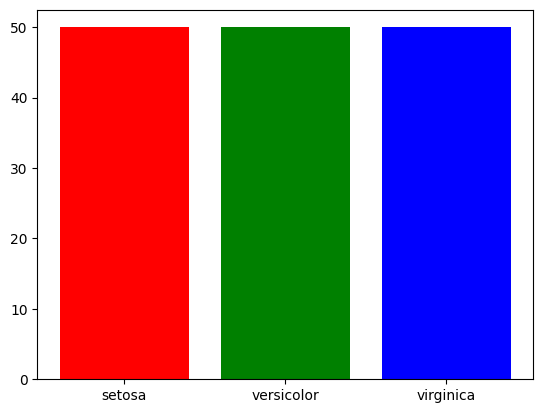

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

_, counts_elements = np.unique(y, return_counts=True)
plt.bar(class_names, counts_elements, color=['r', 'g', 'b'])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

GaussianNB()

In [6]:
X_setosa = X_train[y_train == 0]
X_versicolor = X_train[y_train == 1]
X_virginica = X_train[y_train == 2]

# list of features
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

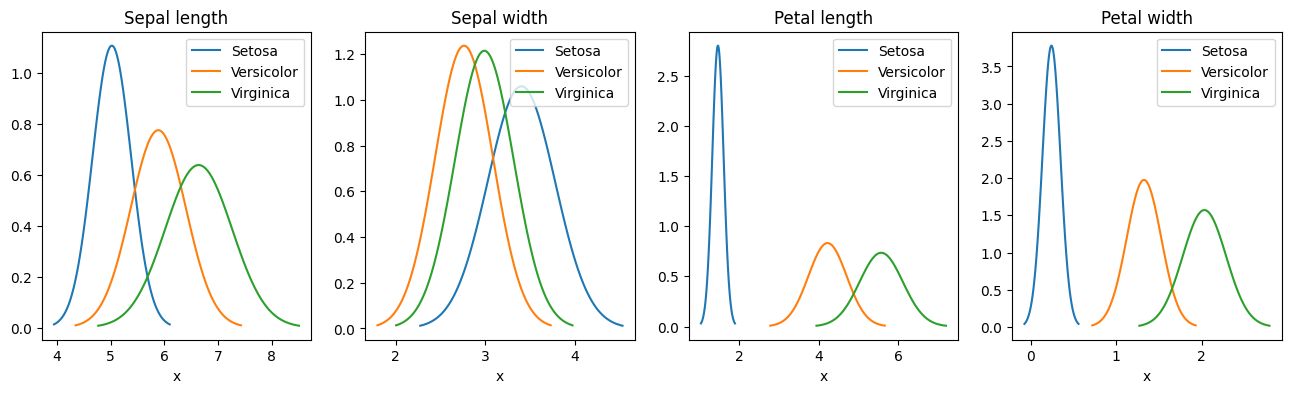

In [7]:
import math
import scipy.stats as stats

# Function to plot the probability distribution
def plot_distribution(ax, x, label):
  mean = x.mean()
  sigma = x.std()
  x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
  ax.plot(x, stats.norm.pdf(x, mean, sigma), label = label)
  ax.legend()
  ax.set_xlabel('x')

# Creating subplots
fig, ax = plt.subplots(ncols=4, figsize=(16,4))

# Plotting the probability distribution of each feature for the corresponding class
for i in range(len(features)):
  plot_distribution(ax[i], X_setosa[:,i], 'Setosa')
  plot_distribution(ax[i], X_versicolor[:,i], 'Versicolor')
  plot_distribution(ax[i], X_virginica[:,i], 'Virginica')
  ax[i].set_title(features[i])

- I used gaussian NB because I had found the features to be continuous.
- Let's look at the probability distribution of Petal width to discuss what these distributions actually mean. You can see that the flowers with petal width 0.1cm to 0.5cm have higher probability of belonging to the species Setosa. Similarly, the flowers with petal width 1cm to 1.6cm have higher probability of belonging to the species Versicolor and the flowers with petal width 1.8cm to higher have higher probability of belonging to the species Virginica. From the above plots, we can see that the two features Petal length and Petal width are very helpful to categorize the flowers. However, Gaussian Naive Bayes uses the probability distributions of all the four features to learn the likelihood P(features|class)
.

### Making predictions

In [8]:
y_pred = gaussian_nb.predict(X_test)
pd.DataFrame(y_pred, columns=['Predicted Class']).head()

,Predicted Class
0,2
1,1
2,0
3,2
4,0
